# WRG: Weapon Recoil Generation

## 1. 좌표 값 생성 함수 설계

In [61]:
import numpy as np

class WeaponRecoilGeneration():
    """
    무기 유형별(기관총, 권총, 산탄총) 반동 궤적 데이터를 생성하는 클래스 입니다

    Attributes:
        shots (int, optional): 총 발사 횟수. 개별 메서드에서 인자로 별도 지정 가능

    Methods:
        machinegun_recoil_points(shots: int):
            기관총 반동 궤적을 생성합니다. 
            반동이 강하고 연속적인 사격 패턴을 모사합니다.
        
        pistol_recoil_points(shots: int):
            권총 반동 궤적을 생성합니다. 
            상대적으로 짧고 일관된 반동 패턴을 가집니다.

        shotgun_recoil_points(shots: int):
            산탄총 반동 궤적을 생성합니다.
            퍼짐이 강한 산포형 탄착군을 모사합니다.
    """

    def __init__(self, shots=None):
        self.shots = shots

    def machinegun_recoil_points(self, shots: int):
        x = []
        y = []

        for i in range(1, shots + 1):
            # 초탄
            if i <= int(shots/3):
                dx = np.random.uniform(0.0, 0.2)        # X축 흔들림 거의 없음
                dy = np.random.uniform(0.0, 0.65)       # Y축 미세 흔들림 증가
            # 중탄
            elif i <= int((shots/3)*2):
                dx = np.random.normal(0.1, 0.3)         # X축 미세 흔들림 증가
                dy = np.random.normal(0.1, 0.3)         # Y축 미세 흔들림 증가
            # 후탄
            else:
                dx = np.random.uniform(-1, 0.5)         # X축 흔들림 강함
                dy = np.random.normal(0.0 , 0.2)        # Y축 흔들림 거의 없음

            x.append(dx)
            y.append(dy)

        # x의 요소를 누적합으로 계산
        x_cum = np.cumsum(x)
        y_cum = np.cumsum(y)
        print("생성이 완료되었습니다")
        
        return x_cum, y_cum

    def pistol_recoil_points(self, shots: int):
        x = []
        y = []

        for i in range(1, shots + 1):
            # 초탄
            if i <= int(shots/3):
                dx = np.random.uniform(0.0, 0.2)        # 약간의 X축 흔들림 부여
                dy = np.random.uniform(0.0, 0.5)        # 세로 반동 (조금 줄임)
            # 중탄
            elif i <= int((shots/3)*2):
                dx = np.random.uniform(0.3, 0.3)        # X축 미세 흔들림 증가
                dy = np.random.uniform(0.3, 0.3)
            # 후탄
            else:
                dx = np.random.uniform(-0.1, 0.3)       # X축 흔들림 강함
                dy = np.random.uniform(-0.1, 0.2)         # Y축 거의 없음

            x.append(dx)
            y.append(dy)

        # x의 요소를 누적합으로 계산
        x_cum = np.cumsum(x)
        y_cum = np.cumsum(y)
        print("생성이 완료되었습니다")

        return x_cum, y_cum
    
    def shotgun_recoil_points(self, shots: int):
        x = []
        y = []

        pellets_per_shot = 16

        for i in range(1, shots + 1):
            for _ in range(pellets_per_shot):
                if i == 1:
                    dx = np.random.normal(0.2, 0.4)        # 약간의 X축 흔들림 부여
                    dy = np.random.normal(0.1, 0.7)        # 세로 반동 (조금 줄임)
                else:
                    dx = np.random.normal(-1.0, 1.5)
                    dy = np.random.normal(-1.0, 1.5)

            x.append(dx)
            y.append(dy)

        # x의 요소를 누적합으로 계산
        x_cum = x
        y_cum = y
        print("생성이 완료되었습니다")

        return x_cum, y_cum  

## 2. 생성 데이터 시각화 및 데이터프레임화 함수 설계

In [22]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt

class RecoilVisualizer():
    """
    총기 반동 궤적 데이터(x, y)를 시각화하고, Pandas DataFrame 형태로 변환하는 기능을 제공하는 클래스입니다.

    Attributes:
        x (list or np.ndarray): X축 좌표값 (수평 반동)
        y (list or np.ndarray): Y축 좌표값 (수직 반동)

    Methods:
        plot_recoil_pattern(x, y):
            주어진 x, y 좌표값을 기반으로 총기 반동 궤적을 시각화합니다.

        dataset(x, y):
            주어진 x, y 좌표값을 Pandas DataFrame으로 변환하여 반환합니다.
    """

    def __init__(self, data=None):
        self.data = data
        
    def plot_recoil_pattern(self, data):
        """생성된 좌표값을 시각화하는 메서드"""
        plt.figure(figsize=(5, 5))
        plt.scatter(data[0], data[1], c='red', s=10, marker='s')  # y축 반전해서 위로 튀는 느낌
        plt.axhline(0, color='black', linestyle='--', linewidth=1)
        plt.axvline(0, color='black', linestyle='--', linewidth=1)
        plt.gca().set_facecolor('white')
        plt.grid(True, linestyle=':', color='grey', alpha=0.3)
        plt.xticks(np.arange(-10, 10, 1))
        plt.yticks(np.arange(-10, 10, 1))
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        plt.gca().set_aspect('equal')
        plt.title("Improved Recoil Pattern (30 shots)", color='black')
        plt.tick_params(colors='black')
        plt.tight_layout()
        
        return plt.show()
    
    def dataset(self, data):
        """생성된 좌표값을 데이터프레임화하는 메서드"""
        df = pd.DataFrame({"x": data[0], "y": data[1]})
        
        return df

## 3. 사용 예시

In [72]:
wrg = WeaponRecoilGeneration()
a = wrg.machinegun_recoil_points(30)
b = wrg.pistol_recoil_points(12)
c = wrg.shotgun_recoil_points(4)

생성이 완료되었습니다
생성이 완료되었습니다
생성이 완료되었습니다


생성이 완료되었습니다


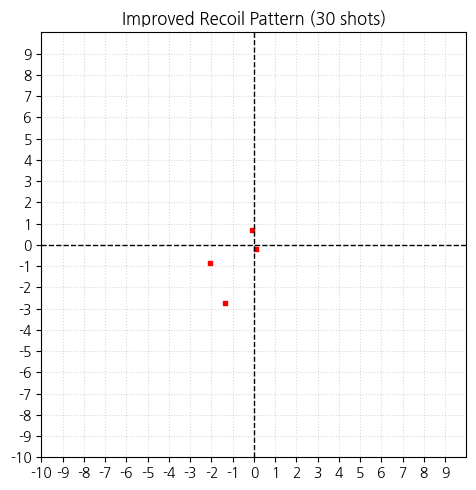

In [71]:
rvz = RecoilVisualizer()
# rvz.plot_recoil_pattern(a)
# rvz.plot_recoil_pattern(b)
c = wrg.shotgun_recoil_points(4)
rvz.plot_recoil_pattern(c)
# rvz.dataset(recoil)

## 5. 학습 데이터 변환

In [14]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

class BulletTrajectory:
    """총알 궤적을 생성하고 전처리 및 분리하는 클래스"""
    def __init__(self):
        self.data = None
        self.X_coords = None
        self.y_coords = None

    def data_load(self, address: str):
        """데이터 로드 함수"""
        with open(address, "r", encoding="utf-8") as f:
            self.data = json.load(f)

        return self.data

    def data_preprocessing(self, raw_data):
        """데이터 전처리 함수"""
        X_coords, y_coords = [], []
        for record in raw_data:
            record_points = record["DATA"]
            X_coords.append(np.array([[point['x']] for point in record_points]))
            y_coords.append(np.array([[point['y']] for point in record_points]))
        self.X_coords = X_coords
        self.y_coords = y_coords

        return X_coords, y_coords

    def weapon_recoil_generation(self, X_coords, y_coords):
        """데이터 프레임 생성하는 함수"""
        df1 = pd.DataFrame(np.array(X_coords).reshape(100, -1))
        df2 = pd.DataFrame(np.array(y_coords).reshape(100, -1))
        X1 = df1.drop(columns=[0])
        y1 = df1[0]
        X2 = df2.drop(columns=[0])
        y2 = df2[0]

        return X1, y1, X2, y2

    def data_split(self, x, y):
        """학습 데이터와 테스트 데이터를 분리하는 함수"""
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        
        return X_train, X_test, X_val, y_train, y_test, y_val

In [15]:
trajectory = BulletTrajectory()

data = trajectory.data_load("data/recoil_segmented_dataset.json")
X, y = trajectory.data_preprocessing(data)
X1, y1, X2, y2 = trajectory.weapon_recoil_generation(X, y)
X_train, X_test, X_val, y_train, y_test, y_val = trajectory.data_split(X1, y1)

## 6. 학습 모델 설정
- 새로운 궤적 패턴 생성
- pip install scikit-learn

[목표]

모델: RandomForestRegressor

데이터: X (총기 반동 궤적 벡터, shape=(100, 59)), y (첫 번째 y 좌표)

평가지표: MSE (Mean Squared Error)

시각화: 예측값 vs 실제값 scatter plot

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import koreanize_matplotlib
import matplotlib.pyplot as plt

model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

MSE: 0.0016


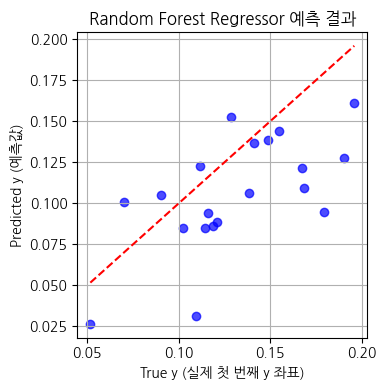

In [25]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True y (실제 첫 번째 y 좌표)")
plt.ylabel("Predicted y (예측값)")
plt.title("Random Forest Regressor 예측 결과")
plt.grid(True)
plt.tight_layout()
plt.show()